# Exploratory Data Analysis (EDA)

In [3]:
from fastparquet import ParquetFile
import pandas as pd

pd.set_option('display.max_columns', None) # Prikaz svih kolona

train_set = '../data/UNSW_NB15_training-set.parquet'
test_set = '../data/UNSW_NB15_testing-set.parquet'

pf_train_set = ParquetFile(train_set)
pf_test_set = ParquetFile(test_set)

df_train = pf_train_set.to_pandas()
df_test = pf_test_set.to_pandas()

# df_train.info()
# df_test.info()

df_train.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087486,14158.942383,8495.365234,0,0,24.295601,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,1,0,0,0,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473373,8395.112305,503571.312500,2,17,49.915001,15.432865,61.426933,1387.778320,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,1,1,0,0,0,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,1572.271851,60929.230469,1,6,231.875565,102.737206,17179.585938,11420.925781,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,1,1,0,0,0,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,2740.178955,3358.622070,1,3,152.876541,90.235725,259.080170,4991.784668,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,1,1,0,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373825,8561.499023,3987.059814,2,1,47.750332,75.659599,2415.837646,115.806999,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,2,1,0,0,0,0,Normal,0


In [4]:
print('Broj redova i kolona u train setu: ', df_train.shape)
print('Broj redova i kolona u test setu: ', df_test.shape)

Broj redova i kolona u train setu:  (175341, 36)
Broj redova i kolona u test setu:  (82332, 36)


In [5]:
# Prikaz nedostajucih vrijednosti ako postoje
df_train.isna().sum()

dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
is_sm_ips_ports      0
attack_cat           0
label                0
dtype: int64

In [6]:
df_test.isna().sum()

dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
is_sm_ips_ports      0
attack_cat           0
label                0
dtype: int64

In [7]:
df_train.describe() # Deskriptivna statiskika dataframe-a

,dur,spkts,dpkts,sbytes,dbytes,rate,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,95406.179688,7.345403e+07,6.712055e+05,4.953000,6.948010,985.976807,88.216301,4.976255e+03,604.353821,116.257339,9.692504e+08,9.688770e+08,115.013625,0.041396,0.021020,0.020375,136.751769,124.173382,0.105982,2.144292e+03,5.383538,4.206255,0.014948,0.014948,0.133066,0.015752,0.680622
std,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,165400.968750,1.883574e+08,2.421312e+06,66.005059,52.732999,7242.245605,987.093201,4.496585e+04,4061.043213,127.001024,1.355264e+09,1.354000e+09,126.886530,0.079354,0.043400,0.040506,204.677360,258.317056,0.776911,5.420797e+04,8.047104,5.783585,0.126048,0.126048,0.701208,0.124516,0.466237
min,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,32.786140,1.305334e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3225.806641,8.796748e+05,1.447023e+03,0.000000,0.000000,0.279733,0.006000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,73.000000,44.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,125000.000000,8.888889e+07,2.784487e+04,3.000000,2.000000,55.156895,51.053001,2.513295e+03,114.990623,255.000000,1.916651e+09,1.913675e+09,255.000000,0.065481,0.023268,0.038906,100.000000,89.000000,0.000000,0.000000e+00,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1000000.000000,5.988000e+09,2.242273e+07,4803.000000,5484.000000,84371.492188,56716.824219,1.460480e+06,289388.281250,255.000000,4.294959e+09,4.294882e+09,255.000000,2.518893,2.100352,1.520884,1504.000000,1458.000000,172.000000,6.558056e+06,51.000000,46.000000,4.000000,4.000000,30.000000,1.000000,1.000000


In [8]:
df_test.describe()
# df_test.describe(include='all') # Ukljucuje ne-numericke feature-e


,dur,spkts,dpkts,sbytes,dbytes,rate,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,82332.000000,8.233200e+04,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.00000,8.233200e+04,8.233200e+04,82332.00000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,82410.890625,6.454902e+07,6.305469e+05,4.753692,6.308556,755.394287,121.701286,6.363075e+03,535.180420,133.45908,1.084642e+09,1.073465e+09,128.28662,0.055925,0.029256,0.026669,139.528604,116.275069,0.094277,1.595372e+03,4.928898,3.663011,0.008284,0.008381,0.129743,0.011126,0.550600
std,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,148620.375000,1.798618e+08,2.393000e+06,64.649620,55.708021,6182.615723,1292.378418,5.672402e+04,3635.305420,127.35700,1.390860e+09,1.381996e+09,127.49137,0.116022,0.070854,0.055094,208.472063,244.600271,0.542922,3.806697e+04,8.389545,5.915386,0.091171,0.092485,0.638683,0.104891,0.497436
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,28.606114,1.120247e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2650.176758,5.770032e+05,2.112951e+03,1.000000,0.000000,0.557929,0.010000,1.762392e+01,0.000000,255.00000,2.788886e+07,2.856975e+07,255.00000,0.000551,0.000441,0.000080,65.000000,44.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,111111.109375,6.514286e+07,1.585808e+04,3.000000,2.000000,63.409445,63.136368,3.219332e+03,128.459915,255.00000,2.171310e+09,2.144205e+09,255.00000,0.105541,0.052595,0.048816,100.000000,87.000000,0.000000,0.000000e+00,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1000000.000000,5.268000e+09,2.082111e+07,5319.000000,5507.000000,60009.992188,57739.238281,1.483831e+06,463199.250000,255.00000,4.294950e+09,4.294881e+09,255.00000,3.821465,3.226788,2.928778,1504.000000,1500.000000,131.000000,5.242880e+06,59.000000,38.000000,2.000000,2.000000,16.000000,1.000000,1.000000


In [9]:
df_train.nunique() # Broj jedinstvenih vrijednosti za svaki feature

dur                  74039
proto                  133
service                 13
state                    9
spkts                  480
dpkts                  443
sbytes                7214
dbytes                6660
rate                 76794
sload                80885
dload                77474
sloss                  409
dloss                  370
sinpkt               76050
dinpkt               74177
sjit                 77390
djit                 76743
swin                    13
stcpb                75265
dtcpb                75089
dwin                     7
tcprtt               43319
synack               40142
ackdat               37708
smean                 1357
dmean                 1328
trans_depth             11
response_body_len     2386
ct_src_dport_ltm        47
ct_dst_sport_ltm        32
is_ftp_login             4
ct_ftp_cmd               4
ct_flw_http_mthd        11
is_sm_ips_ports          2
attack_cat              10
label                    2
dtype: int64

In [10]:
df_train['proto'].value_counts() # Broj razlicitih kategorija za feature 

proto
tcp     79946
udp     63283
unas    12084
arp      2859
ospf     2595
        ...  
hmp        98
rdp        98
igmp       18
icmp       15
rtp         1
Name: count, Length: 133, dtype: int64

In [11]:
df_train.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087486,14158.942383,8495.365234,0,0,24.295601,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,1,0,0,0,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473373,8395.112305,503571.312500,2,17,49.915001,15.432865,61.426933,1387.778320,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,1,1,0,0,0,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,1572.271851,60929.230469,1,6,231.875565,102.737206,17179.585938,11420.925781,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,1,1,0,0,0,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,2740.178955,3358.622070,1,3,152.876541,90.235725,259.080170,4991.784668,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,1,1,0,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373825,8561.499023,3987.059814,2,1,47.750332,75.659599,2415.837646,115.806999,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,2,1,0,0,0,0,Normal,0


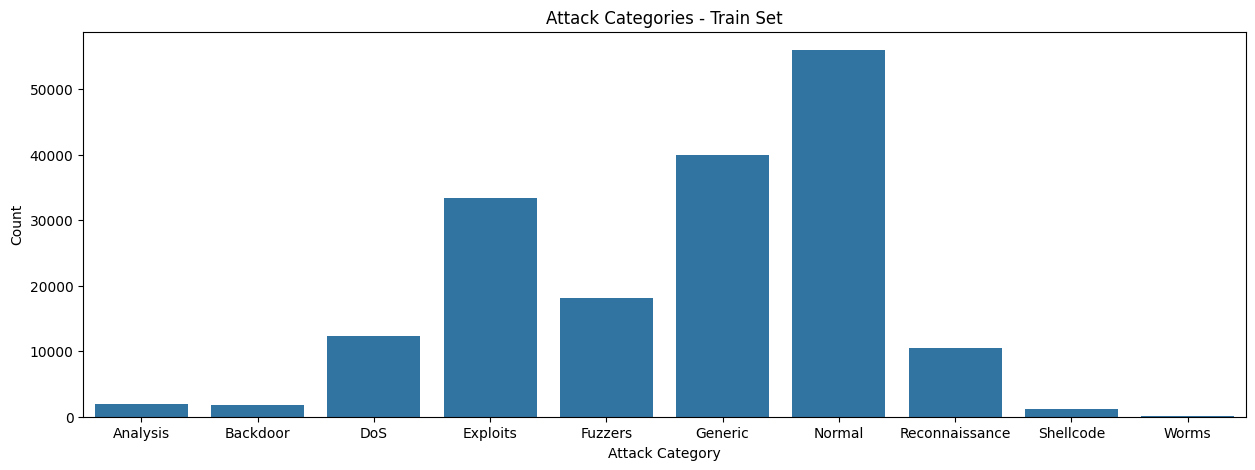

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
# sns.histplot(data = df_train['attack_cat'])
sns.countplot(x=df_train['attack_cat'])
plt.title('Attack Categories - Train Set')
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.show()

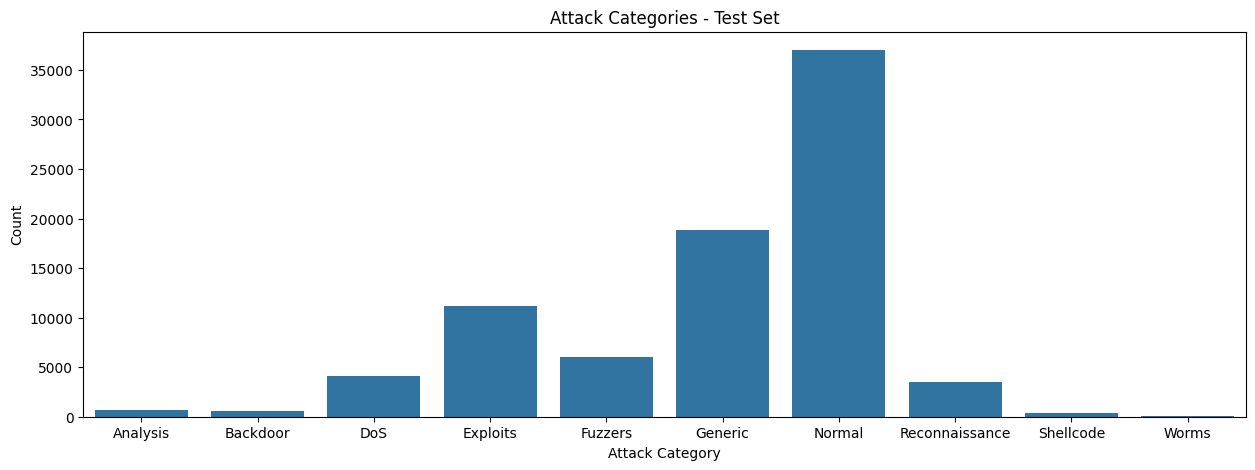

In [13]:
plt.figure(figsize=(15,5))
# sns.histplot(data = df_test['attack_cat'])
sns.countplot(x=df_test['attack_cat'])
plt.title('Attack Categories - Test Set')
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.show()

In [14]:
# Podjela na kontinualne i kategoricke vrijednosti
df_train_con = df_train.select_dtypes(include=['float32', 'int16', 'int32', 'int64', 'int8']) # Kontinualne kolone
df_train_discrete = df_train.select_dtypes(include=['category']) # Diskretne kolone

## Korelacija između feature-a

In [15]:
corr_con = df_train_con.corr() # Korelacija kontinualnih kolona
corr_con

,dur,spkts,dpkts,sbytes,dbytes,rate,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,label
dur,1.000000,0.254559,0.181182,0.199731,0.144134,-0.120966,-0.081749,-0.050603,0.198597,0.142963,0.080055,0.152142,0.144413,0.157443,0.022047,0.013183,0.014724,0.017527,0.053125,0.051093,0.049332,0.090028,0.025336,0.002071,0.078915,-0.094091,-0.093923,0.020641,0.020641,0.024743,0.035370,0.036175
spkts,0.254559,1.000000,0.390067,0.963791,0.206609,-0.076358,-0.051646,0.075897,0.971069,0.207798,-0.017587,-0.001678,-0.000384,0.017096,0.131813,0.107410,0.102161,0.133102,0.039187,0.035507,0.038725,0.216592,0.150237,0.008834,0.087217,-0.068373,-0.072484,0.009951,0.009951,0.006084,-0.017770,-0.052178
dpkts,0.181182,0.390067,1.000000,0.188476,0.971907,-0.098202,-0.066710,0.139145,0.204883,0.978636,-0.022160,-0.006514,0.000229,0.054371,0.183703,0.144119,0.142667,0.185555,0.020915,0.015936,0.023899,0.014697,0.441445,0.029042,0.442194,-0.086695,-0.094267,0.013491,0.013491,0.047974,-0.021765,-0.118591
sbytes,0.199731,0.963791,0.188476,1.000000,0.009926,-0.028468,-0.018322,-0.007829,0.996109,0.006804,-0.006565,0.000024,-0.002054,-0.003516,0.050450,0.043164,0.037988,0.050981,0.043624,0.039739,0.042883,0.232348,-0.004973,0.003428,0.001620,-0.026490,-0.027281,-0.004515,-0.004515,-0.002185,-0.006367,0.018576
dbytes,0.144134,0.206609,0.971907,0.009926,1.000000,-0.059475,-0.040430,0.104757,0.017366,0.996504,-0.013618,-0.007701,-0.002422,0.047354,0.113148,0.086894,0.086453,0.114269,0.003907,0.000101,0.007546,-0.036635,0.419965,0.030912,0.470905,-0.052135,-0.056901,-0.010460,-0.010460,0.051403,-0.013147,-0.076871
rate,-0.120966,-0.076358,-0.098202,-0.028468,-0.059475,1.000000,0.602492,-0.153051,-0.042923,-0.075259,-0.075745,-0.051539,-0.063370,-0.085802,-0.515681,-0.408750,-0.409046,-0.518117,-0.300794,-0.279271,-0.290051,-0.113232,-0.273323,-0.078556,-0.022752,0.353589,0.390721,-0.068140,-0.068140,-0.109297,-0.072948,0.337979
sload,-0.081749,-0.051646,-0.066710,-0.018322,-0.040430,0.602492,1.000000,-0.106294,-0.028891,-0.051170,-0.048757,-0.034840,-0.042447,-0.058021,-0.352404,-0.277169,-0.277358,-0.351311,-0.203295,-0.188753,-0.196030,0.223856,-0.186439,-0.053115,-0.015419,0.100118,0.082462,-0.046194,-0.046194,-0.073920,-0.049327,0.182870
dload,-0.050603,0.075897,0.139145,-0.007829,0.104757,-0.153051,-0.106294,1.000000,0.008100,0.123147,-0.037649,-0.024324,-0.029459,-0.032966,0.270693,0.215257,0.211698,0.273651,-0.135497,-0.125184,-0.131319,-0.083990,0.550602,-0.027110,0.024878,-0.143573,-0.153429,-0.027810,-0.027810,-0.039246,-0.035069,-0.393739
sloss,0.198597,0.971069,0.204883,0.996109,0.017366,-0.042923,-0.028891,0.008100,1.000000,0.017970,-0.009674,0.000759,0.000540,0.002481,0.081976,0.068151,0.062839,0.082347,0.051411,0.047152,0.050196,0.229826,0.016538,0.003564,-0.001846,-0.039158,-0.041109,0.005688,0.005688,-0.002049,-0.009492,-0.000640
dloss,0.142963,0.207798,0.978636,0.006804,0.996504,-0.075259,-0.051170,0.123147,0.017970,1.000000,-0.017159,-0.008042,-0.002074,0.049960,0.143940,0.111553,0.111077,0.145361,0.010221,0.005596,0.014029,-0.030913,0.429533,0.028519,0.462129,-0.066411,-0.072203,0.007763,0.007763,0.048869,-0.016669,-0.094685


In [16]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Enkodiranje diskretnih kolona u numericke
col = list(df_train_discrete)
df_train_discrete[col] = df_train_discrete[col].apply(encoder.fit_transform)
df_train_discrete.head()

,proto,service,state,attack_cat
0,113,0,2,6
1,113,0,2,6
2,113,0,2,6
3,113,3,2,6
4,113,0,2,6


In [17]:
corr_discrete = df_train_discrete.corr()
corr_discrete

,proto,service,state,attack_cat
proto,1.000000,0.170032,-0.172441,0.174490
service,0.170032,1.000000,-0.144978,-0.056009
state,-0.172441,-0.144978,1.000000,-0.237008
attack_cat,0.174490,-0.056009,-0.237008,1.000000


<Axes: >

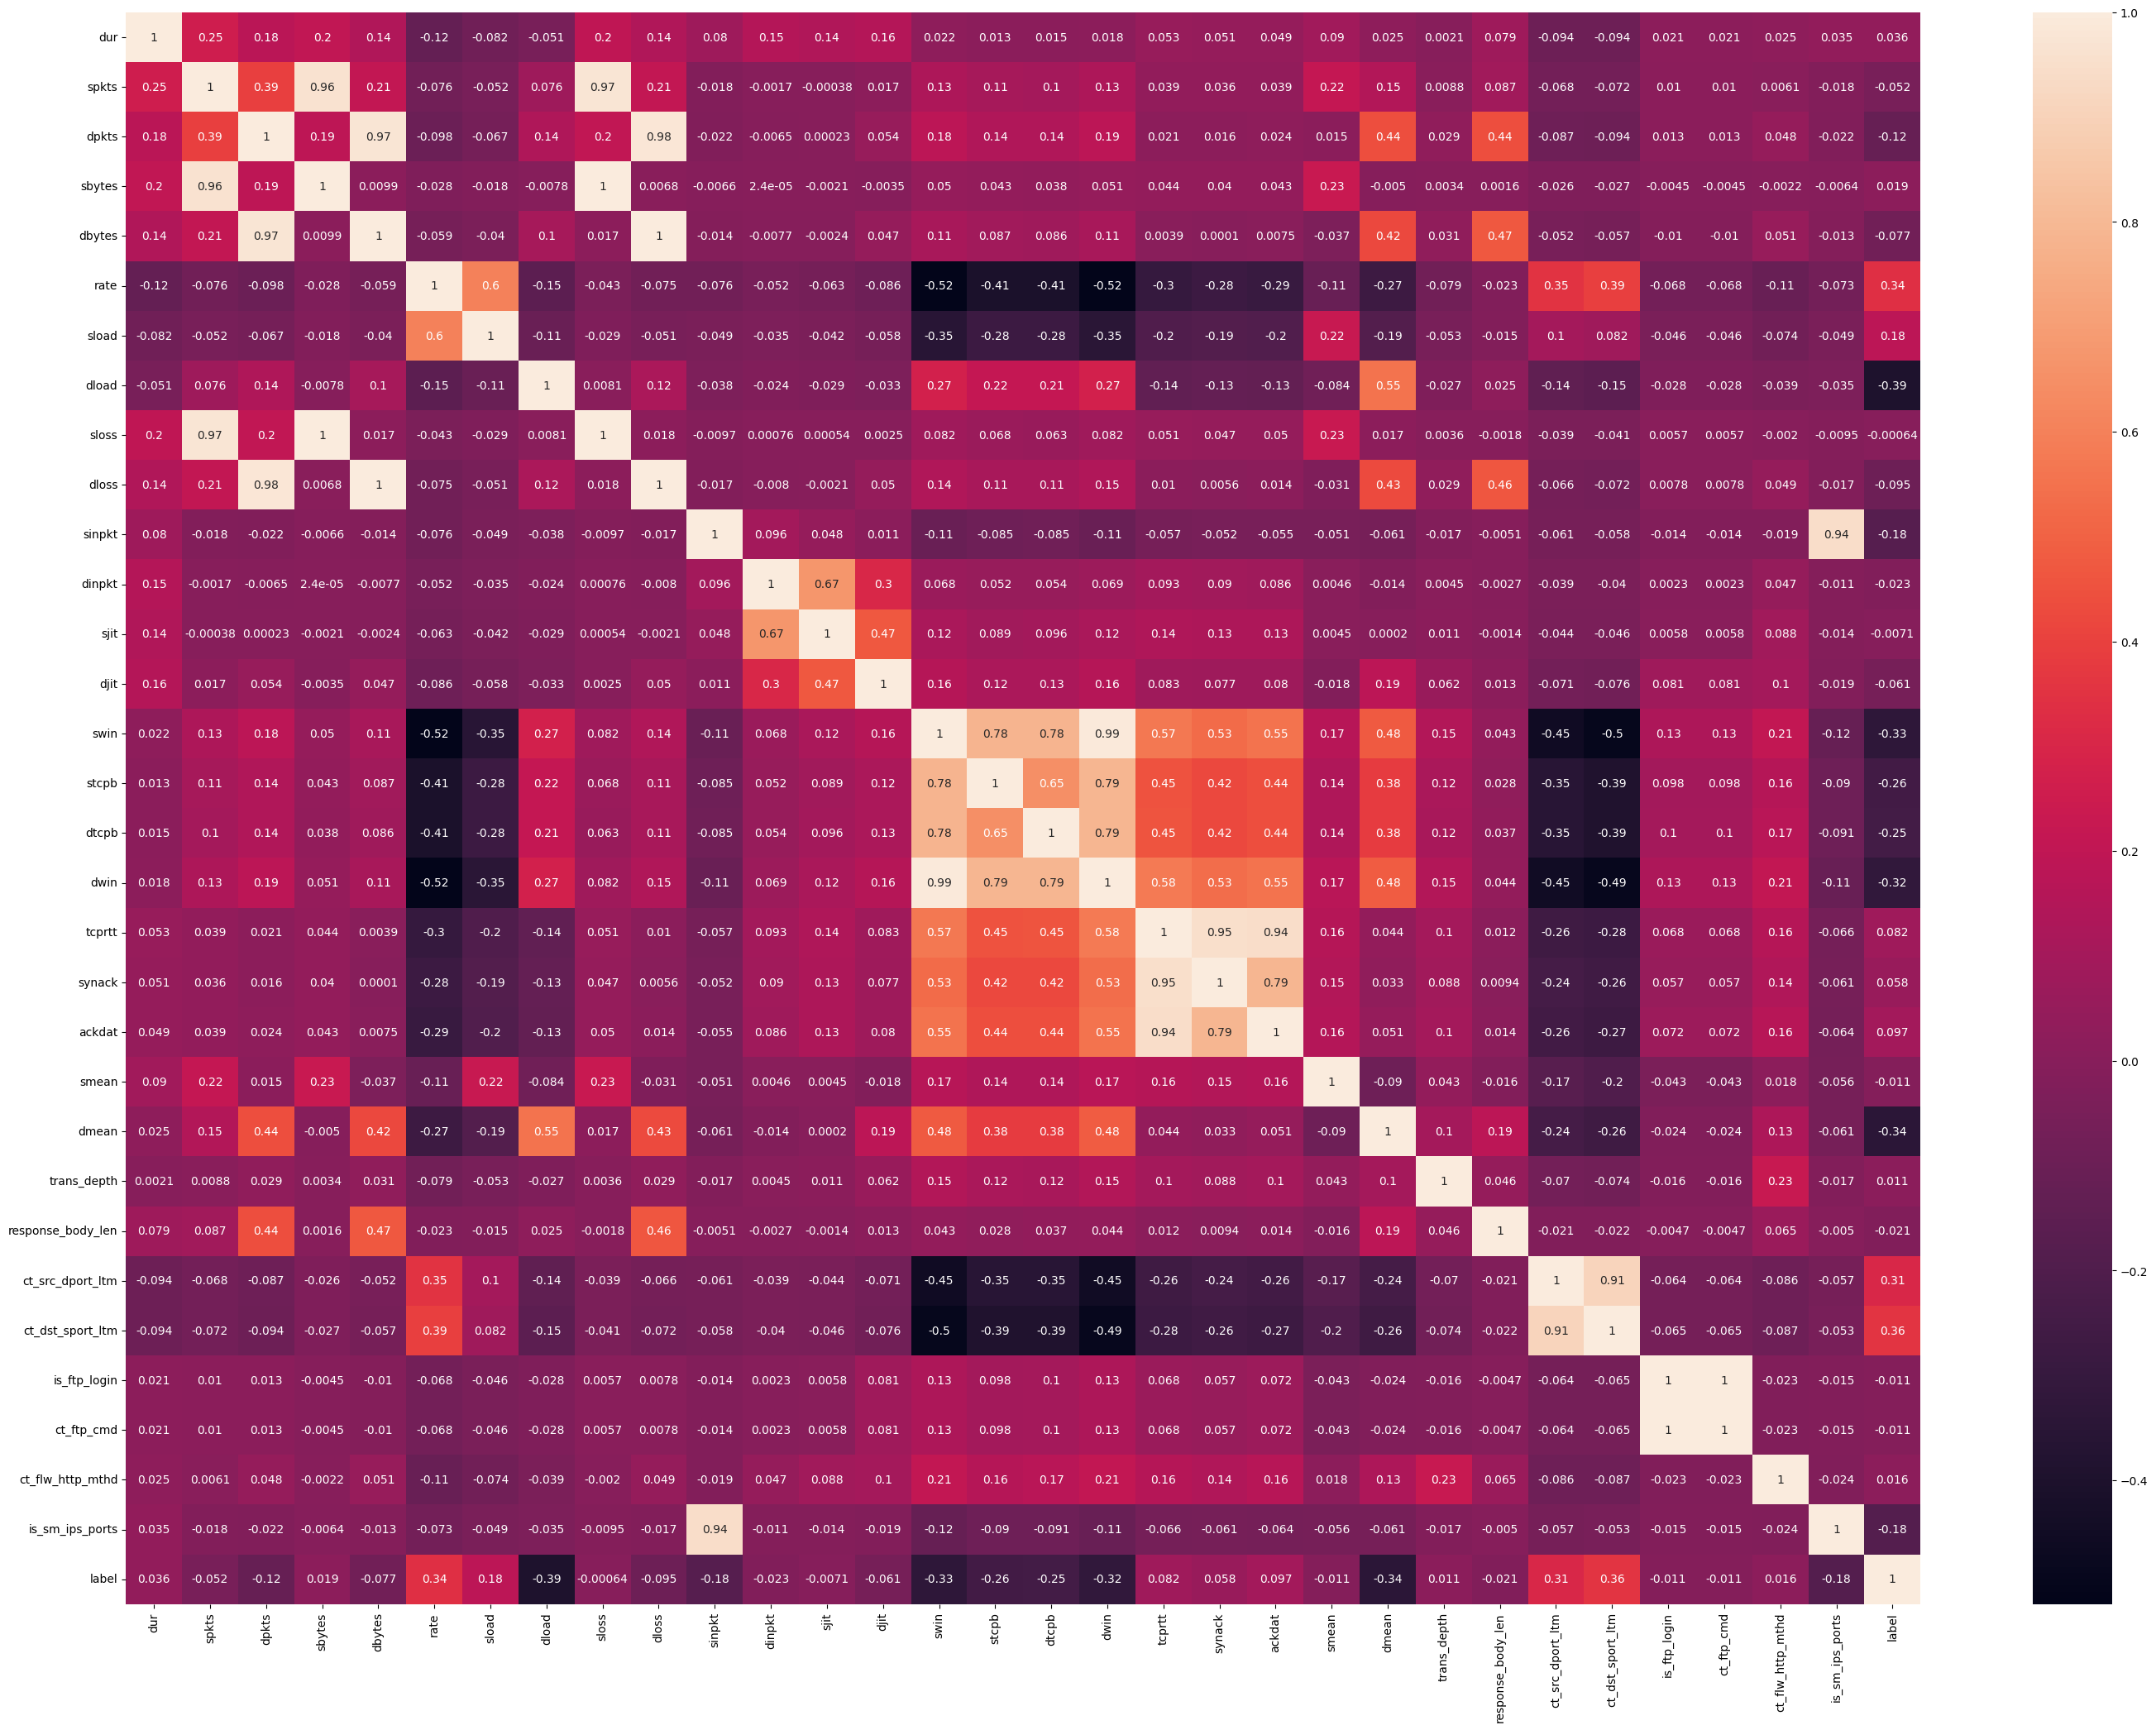

In [18]:
# Vizualizacija korelacije kontinualnih kolona
plt.figure(figsize=(35, 25))
sns.heatmap(corr_con, annot=True)

<Axes: >

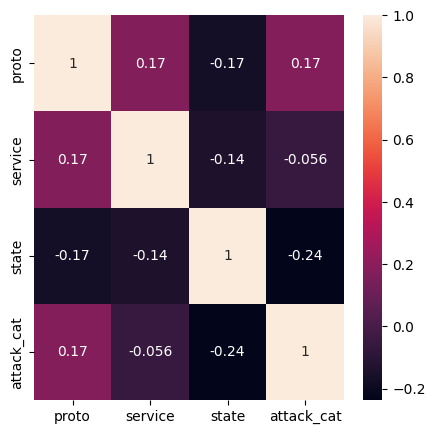

In [19]:
# Vizualizacija korelacije diskretnih kolona
plt.figure(figsize=(5, 5))
sns.heatmap(corr_discrete, annot=True)